In [1]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from matplotlib.ticker import MultipleLocator 
%matplotlib inline

In [2]:
path = os.getcwd().split('TianChi_IJCAI-17_footfall_prediction_code')[0]

#shop_info = pd.read_table(path+'dataset/shop_info.txt',names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)
shop_info = pd.read_table(path+'dataset/shop info with count.csv',delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)

shop_info.index = shop_info['shop_id'].tolist()

In [3]:
def dateRange(start, end):
    days = (datetime.datetime.strptime(end, "%Y-%m-%d") - datetime.datetime.strptime(start, "%Y-%m-%d")).days + 1
    return [datetime.datetime.strftime(datetime.datetime.strptime(start, "%Y-%m-%d") + datetime.timedelta(i), "%Y-%m-%d") for i in xrange(days)]
#len(dateRange('2015-07-01','2016-10-31'))

In [4]:
#占个格子
for day_number in range(1,15): #1～14
    predict_day_col = 'predict_day_'+str(day_number)
    shop_info[predict_day_col] = 0 

In [5]:
"""
return_int = False

n=5
start_date = (pd.to_datetime('2016-10-31').date()-datetime.timedelta(days=(n-1))).strftime("%Y-%m-%d")
M = [float(i) for i in shop_info.loc[198][start_date:'2016-10-31'].tolist()] 
print M
best_score = np.inf
best_count = 0.0
if return_int == True : possible_count_range = np.arange(min(M),max(M)+1)
else : possible_count_range = np.arange(min(M),max(M)+1,0.1)
for possible_count in possible_count_range :
    #print possible_count
    score = np.sum(np.fabs((possible_count-M)/(possible_count+M))) / len(M)
    print 'score',score,'best_score',best_score,'best_count',best_count
    if score < best_score:
        best_score = score
        best_count = possible_count

print best_count
"""
###   一个结果发现  损失函数最优值会取到14天正确值的某一个中间值（这大概与 L1范数取到0同理,即梯度不变导致0点取得极值）


'\nreturn_int = False\n\nn=5\nstart_date = (pd.to_datetime(\'2016-10-31\').date()-datetime.timedelta(days=(n-1))).strftime("%Y-%m-%d")\nM = [float(i) for i in shop_info.loc[198][start_date:\'2016-10-31\'].tolist()] \nprint M\nbest_score = np.inf\nbest_count = 0.0\nif return_int == True : possible_count_range = np.arange(min(M),max(M)+1)\nelse : possible_count_range = np.arange(min(M),max(M)+1,0.1)\nfor possible_count in possible_count_range :\n    #print possible_count\n    score = np.sum(np.fabs((possible_count-M)/(possible_count+M))) / len(M)\n    print \'score\',score,\'best_score\',best_score,\'best_count\',best_count\n    if score < best_score:\n        best_score = score\n        best_count = possible_count\n\nprint best_count\n'

In [6]:
(pd.to_datetime('2016-10-31').date()-datetime.timedelta(days=(14-1))).strftime("%Y-%m-%d")

'2016-10-18'

In [7]:
def cal_optimal_score_function_count_n_days_sub(n,x):
    start_date = (pd.to_datetime('2016-10-31').date()-datetime.timedelta(days=(n-1))).strftime("%Y-%m-%d")
    M = [float(i) for i in x[start_date:'2016-10-31'].tolist()] 
    best_score = np.inf
    best_count = 0
    for possible_count in np.arange(min(M),max(M)+1) :
        #print possible_count
        score = np.sum(np.fabs((possible_count-M)/(possible_count+M))) / len(M)
        #print 'score',score,'best_score',best_score,'possible_count',possible_count
        if score < best_score:
            best_score = score
            best_count = possible_count
            
    return best_count
  
    
def cal_optimal_score_function_count_n_days(n):
    shop_info['count_optimal_score_'+str(n)+'_days'] = shop_info.apply(lambda x:cal_optimal_score_function_count_n_days_sub(n,x) ,axis=1)    

In [8]:
def update_predict_day(n):
    for day_number in range(1,15): #1～14
        predict_day_col = 'predict_day_'+str(day_number)
        print predict_day_col
        shop_info[predict_day_col] = shop_info['count_optimal_score_'+str(n)+'_days'].apply(lambda x:int(x+0.5))
        

In [9]:
def save_result(n):
    shop_info.loc[:,'predict_day_1':'predict_day_14'].to_csv('Prediction(count optimal score '+str(n)+' days).csv',sep=',',index=True,columns=None)
    

### cal_optimal_score_function_count_n_days(14)

In [10]:
cal_optimal_score_function_count_n_days(14)
    

In [11]:
update_predict_day(14)

predict_day_1
predict_day_2
predict_day_3
predict_day_4
predict_day_5
predict_day_6
predict_day_7
predict_day_8
predict_day_9
predict_day_10
predict_day_11
predict_day_12
predict_day_13
predict_day_14


In [11]:
#save_result(14)

### cal_optimal_score_function_count_n_days(21)

In [12]:
cal_optimal_score_function_count_n_days(21)
update_predict_day(21)

predict_day_1
predict_day_2
predict_day_3
predict_day_4
predict_day_5
predict_day_6
predict_day_7
predict_day_8
predict_day_9
predict_day_10
predict_day_11
predict_day_12
predict_day_13
predict_day_14


In [13]:
shop_info['count_optimal_score_21_days']

1       239.0
2        96.0
3        75.0
4       110.0
5       218.0
6       104.0
7       128.0
8        68.0
9       220.0
10       93.0
11       89.0
12       59.0
13      236.0
14       58.0
15      134.0
16       42.0
17       88.0
18       87.0
19      152.0
20      150.0
21       79.0
22      110.0
23       12.0
24       69.0
25      119.0
26       69.0
27       88.0
28       67.0
29      100.0
30       46.0
        ...  
1971    229.0
1972     84.0
1973     45.0
1974    151.0
1975    196.0
1976     98.0
1977    132.0
1978    196.0
1979     66.0
1980     50.0
1981    104.0
1982     73.0
1983    107.0
1984     61.0
1985    451.0
1986     93.0
1987     54.0
1988    189.0
1989     69.0
1990     86.0
1991    130.0
1992     66.0
1993     74.0
1994    147.0
1995     63.0
1996     85.0
1997    285.0
1998    513.0
1999    310.0
2000    159.0
Name: count_optimal_score_21_days, dtype: float64

In [29]:
#save_result(21)

### cal_optimal_score_function_count_n_days(7)

In [130]:
cal_optimal_score_function_count_n_days(7)
update_predict_day(7)

predict_day_1
predict_day_2
predict_day_3
predict_day_4
predict_day_5
predict_day_6
predict_day_7
predict_day_8
predict_day_9
predict_day_10
predict_day_11
predict_day_12
predict_day_13
predict_day_14


In [33]:
save_result(7)

### cal_optimal_score_function_count_avg_1_to_21_days()

In [14]:
for i in range(1,21+1):
    cal_optimal_score_function_count_n_days(i)

In [15]:
avg_1_to_21_days_cols = ['count_optimal_score_'+ str(i) +'_days' for i in range(1,21+1)]


In [16]:
shop_info.loc[1].loc[avg_1_to_21_days_cols]

count_optimal_score_1_days     180
count_optimal_score_2_days     180
count_optimal_score_3_days     251
count_optimal_score_4_days     257
count_optimal_score_5_days     251
count_optimal_score_6_days     251
count_optimal_score_7_days     251
count_optimal_score_8_days     251
count_optimal_score_9_days     243
count_optimal_score_10_days    243
count_optimal_score_11_days    230
count_optimal_score_12_days    230
count_optimal_score_13_days    226
count_optimal_score_14_days    230
count_optimal_score_15_days    226
count_optimal_score_16_days    230
count_optimal_score_17_days    230
count_optimal_score_18_days    243
count_optimal_score_19_days    230
count_optimal_score_20_days    239
count_optimal_score_21_days    239
Name: 1, dtype: object

In [17]:
avg_1_to_21_days_cols = ['count_optimal_score_'+ str(i) +'_days' for i in range(1,21+1)]
shop_info['optimal_count_avg_1_to_21_days'] = shop_info.apply(lambda x: int(x.loc[avg_1_to_21_days_cols].mean()) , axis = 1)

In [22]:
for day_number in range(1,14+1):
    predict_day_col = 'predict_day_'+str(day_number)
    print predict_day_col
    shop_info[predict_day_col] = shop_info['optimal_count_avg_1_to_21_days'].apply(lambda x:x)


predict_day_1
predict_day_2
predict_day_3
predict_day_4
predict_day_5
predict_day_6
predict_day_7
predict_day_8
predict_day_9
predict_day_10
predict_day_11
predict_day_12
predict_day_13
predict_day_14


In [24]:
shop_info.loc[:,'predict_day_1':'predict_day_14'].to_csv('Prediction(count_optimal_score_function_count_avg_1_to_21_days).csv',sep=',',index=True,columns=None)

In [19]:
shop_info['optimal_count_avg_1_to_21_days']

1       233
2        93
3        87
4       113
5       225
6       104
7       125
8        65
9       226
10       94
11       89
12       63
13      236
14       59
15      141
16       39
17       89
18       94
19      154
20      144
21       86
22      120
23       38
24       74
25      119
26       65
27       87
28       70
29      118
30       49
       ... 
1971    220
1972     80
1973     37
1974    142
1975    220
1976     98
1977    126
1978    208
1979     66
1980     49
1981    105
1982     83
1983    111
1984     65
1985    453
1986     93
1987     57
1988    195
1989     68
1990     88
1991    124
1992     72
1993     72
1994    148
1995     64
1996     92
1997    250
1998    541
1999    315
2000    134
Name: optimal_count_avg_1_to_21_days, dtype: int64

### some other test

In [23]:
shop_info.head()

,shop_id,city_name,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name,...,count_optimal_score_11_days,count_optimal_score_12_days,count_optimal_score_13_days,count_optimal_score_15_days,count_optimal_score_16_days,count_optimal_score_17_days,count_optimal_score_18_days,count_optimal_score_19_days,count_optimal_score_20_days,optimal_count_avg_1_to_21_days
1,1,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点,...,230.0,230.0,226.0,226.0,230.0,230.0,243.0,230.0,239.0,233
2,2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN,...,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,93
3,3,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶,...,102.0,102.0,88.0,80.0,88.0,88.0,88.0,80.0,75.0,87
4,4,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN,...,110.0,104.0,110.0,104.0,104.0,110.0,110.0,110.0,110.0,113
5,5,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果,...,239.0,221.0,221.0,221.0,215.0,215.0,211.0,215.0,215.0,225


In [115]:
shop_info.columns.tolist()[-50:]

[u'2016-10-17',
 u'2016-10-18',
 u'2016-10-19',
 u'2016-10-20',
 u'2016-10-21',
 u'2016-10-22',
 u'2016-10-23',
 u'2016-10-24',
 u'2016-10-25',
 u'2016-10-26',
 u'2016-10-27',
 u'2016-10-28',
 u'2016-10-29',
 u'2016-10-30',
 u'2016-10-31',
 'predict_day_1',
 'predict_day_2',
 'predict_day_3',
 'predict_day_4',
 'predict_day_5',
 'predict_day_6',
 'predict_day_7',
 'predict_day_8',
 'predict_day_9',
 'predict_day_10',
 'predict_day_11',
 'predict_day_12',
 'predict_day_13',
 'predict_day_14',
 'count_optimal_score_14_days',
 'count_optimal_score_21_days',
 'count_optimal_score_7_days',
 'count_optimal_score_1_days',
 'count_optimal_score_2_days',
 'count_optimal_score_3_days',
 'count_optimal_score_4_days',
 'count_optimal_score_5_days',
 'count_optimal_score_6_days',
 'count_optimal_score_8_days',
 'count_optimal_score_9_days',
 'count_optimal_score_10_days',
 'count_optimal_score_11_days',
 'count_optimal_score_12_days',
 'count_optimal_score_13_days',
 'count_optimal_score_15_days',


### 可视化

In [35]:
shop_info.columns.tolist()[-50:]

[u'2016-09-29',
 u'2016-09-30',
 u'2016-10-01',
 u'2016-10-02',
 u'2016-10-03',
 u'2016-10-04',
 u'2016-10-05',
 u'2016-10-06',
 u'2016-10-07',
 u'2016-10-08',
 u'2016-10-09',
 u'2016-10-10',
 u'2016-10-11',
 u'2016-10-12',
 u'2016-10-13',
 u'2016-10-14',
 u'2016-10-15',
 u'2016-10-16',
 u'2016-10-17',
 u'2016-10-18',
 u'2016-10-19',
 u'2016-10-20',
 u'2016-10-21',
 u'2016-10-22',
 u'2016-10-23',
 u'2016-10-24',
 u'2016-10-25',
 u'2016-10-26',
 u'2016-10-27',
 u'2016-10-28',
 u'2016-10-29',
 u'2016-10-30',
 u'2016-10-31',
 'predict_day_1',
 'predict_day_2',
 'predict_day_3',
 'predict_day_4',
 'predict_day_5',
 'predict_day_6',
 'predict_day_7',
 'predict_day_8',
 'predict_day_9',
 'predict_day_10',
 'predict_day_11',
 'predict_day_12',
 'predict_day_13',
 'predict_day_14',
 'count_optimal_score_14_days',
 'count_optimal_score_21_days',
 'count_optimal_score_7_days']

In [14]:
def draw_ids_avg(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=True,figsize=(70,10)):
    if by_week:
        xmajorLocator   = MultipleLocator(7) #将x轴次刻度标签设置为5的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    #shop_info.loc[ids,start_date:end_date].mean(axis=0).plot(figsize=(70,10),xlim=())
    shop_info.loc[ids,start_date:end_date].mean(axis=0).plot(figsize=figsize)



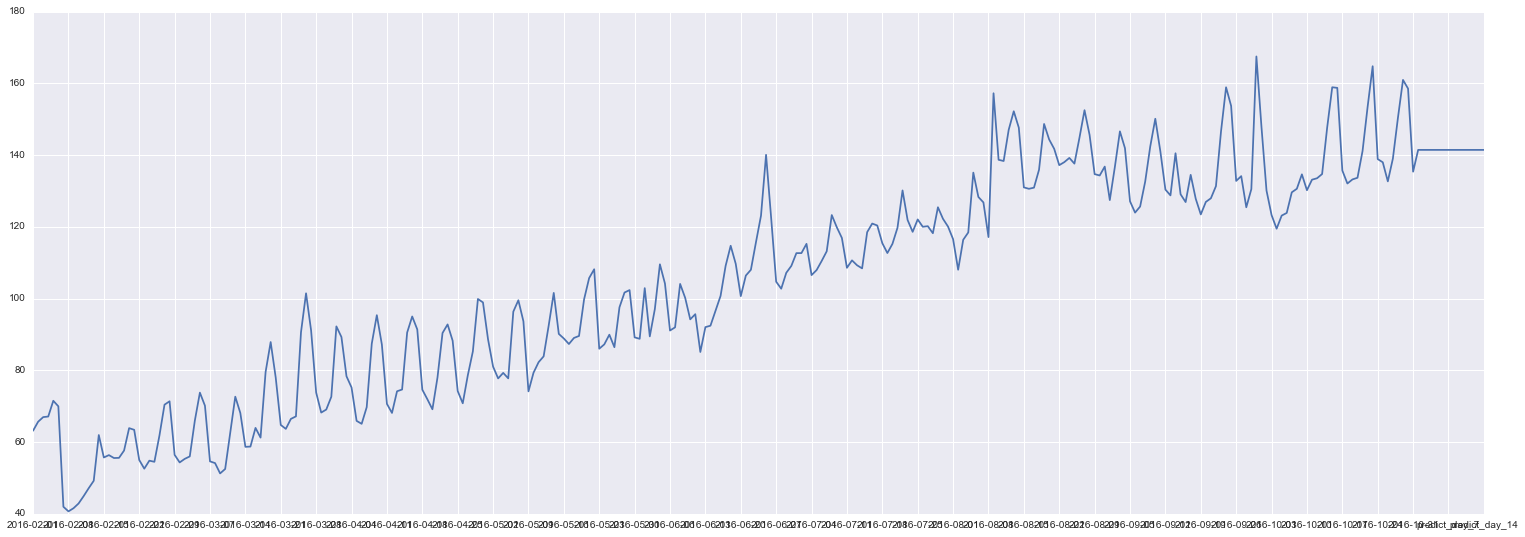

In [112]:
draw_ids_avg(range(1,2001),start_date='2016-02-01',end_date='predict_day_14',by_week=True,figsize=(26,9))

In [75]:
def draw_id(id,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):
    if by_week:
        xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    shop_info.loc[id,start_date:end_date].plot(legend=True,figsize=figsize)
    

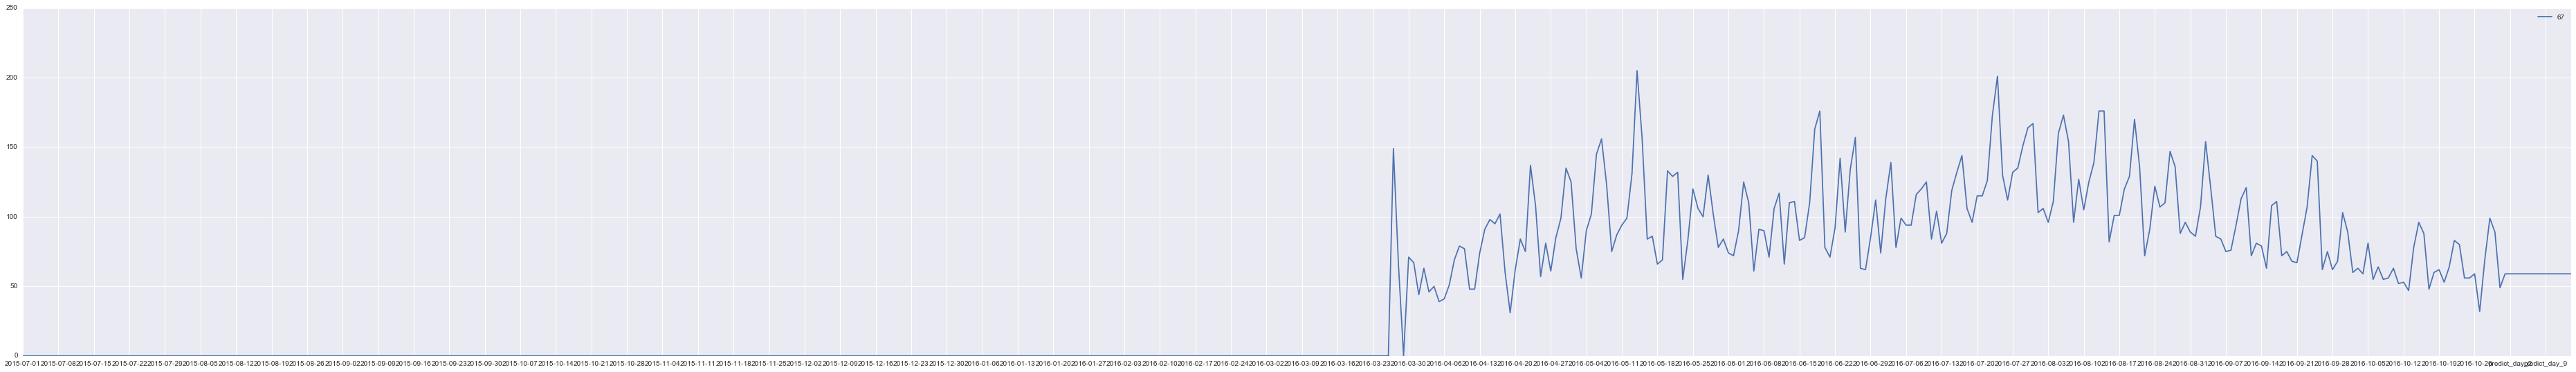

In [110]:

draw_id(id,start_date='2015-07-01',end_date='predict_day_14',by_week=True,figsize=(66,9))
id+=1